## Assessment 2 - Bryson Walter

In [2]:
# Import all the libraries needed
import pandas as pd
import numpy as np
import seaborn as sns   
import matplotlib.pyplot as plt

## Load Dataset

In [3]:
# Get `pandas` to show all columns
pd.set_option('display.max_columns', None)

# Read the "Financial Transactions.csv" file into a Pandas DataFrame
churn = pd.read_csv("Customer-Churn-Records.csv")

# View the first 5 rows of the dataframe
churn.head()

# View the last 5 rows 
# churn.tail()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,1,15634602,Hargrave,619,NSW,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,2,15647311,Hill,608,QLD,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,3,15619304,Onio,502,NSW,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,4,15701354,Boni,699,NSW,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,5,15737888,Mitchell,850,QLD,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425


## Remove Redundant Columns

In [4]:
churn = churn.drop(['RowNumber','CustomerId','Surname'], axis=1)
churn.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,619,NSW,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,608,QLD,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,502,NSW,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,699,NSW,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,850,QLD,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425


In [5]:
churn = pd.get_dummies(churn,columns=['Geography','Gender','Card Type']) #drop_first=True = drops the first category to avoid multicollinearity
churn.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Point Earned,Geography_NSW,Geography_QLD,Geography_VIC,Gender_Female,Gender_Male,Card Type_DIAMOND,Card Type_GOLD,Card Type_PLATINUM,Card Type_SILVER
0,619,42,2,0.00,1,1,1,101348.88,1,1,2,464,1,0,0,1,0,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,3,456,0,1,0,1,0,1,0,0,0
2,502,42,8,159660.80,3,1,0,113931.57,1,1,3,377,1,0,0,1,0,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,5,350,1,0,0,1,0,0,1,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,5,425,0,1,0,1,0,0,1,0,0


## EDA

In [6]:
churn.info()
print("\n --------------------------------------- \n")
churn.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   CreditScore         10000 non-null  int64  
 1   Age                 10000 non-null  int64  
 2   Tenure              10000 non-null  int64  
 3   Balance             10000 non-null  float64
 4   NumOfProducts       10000 non-null  int64  
 5   HasCrCard           10000 non-null  int64  
 6   IsActiveMember      10000 non-null  int64  
 7   EstimatedSalary     10000 non-null  float64
 8   Exited              10000 non-null  int64  
 9   Complain            10000 non-null  int64  
 10  Satisfaction Score  10000 non-null  int64  
 11  Point Earned        10000 non-null  int64  
 12  Geography_NSW       10000 non-null  uint8  
 13  Geography_QLD       10000 non-null  uint8  
 14  Geography_VIC       10000 non-null  uint8  
 15  Gender_Female       10000 non-null  uint8  
 16  Gende

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Point Earned,Geography_NSW,Geography_QLD,Geography_VIC,Gender_Female,Gender_Male,Card Type_DIAMOND,Card Type_GOLD,Card Type_PLATINUM,Card Type_SILVER
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203800,0.204400,3.013800,606.515100,0.501400,0.247700,0.250900,0.454300,0.545700,0.250700,0.25020,0.249500,0.249600
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402842,0.403283,1.405919,225.924839,0.500023,0.431698,0.433553,0.497932,0.497932,0.433438,0.43315,0.432745,0.432803
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000,0.000000,1.000000,119.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000,0.000000,2.000000,410.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000,0.000000,3.000000,605.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.00000,0.000000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000,0.000000,4.000000,801.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.00000,0.000000,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000,1.000000,5.000000,1000.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000


**Create a split of categorical and numerical columns**

In [7]:
# list the numerical columns
numerical_columns = churn.select_dtypes(include=["int64", "float64"]).columns.tolist()
print("Numerical Columns:")
display(pd.DataFrame({'column':numerical_columns}))

Numerical Columns:


,column
0,CreditScore
1,Age
2,Tenure
3,Balance
4,NumOfProducts
5,HasCrCard
6,IsActiveMember
7,EstimatedSalary
8,Exited
9,Complain


In [8]:
numerical_columns

['CreditScore',
 'Age',
 'Tenure',
 'Balance',
 'NumOfProducts',
 'HasCrCard',
 'IsActiveMember',
 'EstimatedSalary',
 'Exited',
 'Complain',
 'Satisfaction Score',
 'Point Earned']

In [9]:
# list the categorical columns
categorical_columns = churn.select_dtypes(include=["object"]).columns.tolist()
print("\nCategorical Columns:")
display(pd.DataFrame({'column':categorical_columns}))


Categorical Columns:


,column


In [10]:
categorical_columns

[]

In [11]:
churn.columns

Index(['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited', 'Complain',
       'Satisfaction Score', 'Point Earned', 'Geography_NSW', 'Geography_QLD',
       'Geography_VIC', 'Gender_Female', 'Gender_Male', 'Card Type_DIAMOND',
       'Card Type_GOLD', 'Card Type_PLATINUM', 'Card Type_SILVER'],
      dtype='object')

------------------------

# Basic Checks
Investigate the data

In [12]:
# Data shape
print("\nDataFrame Dimensions (rows and columns)\n")
print(f"Row count: {churn.shape[0]}")
print(f"Attribute count: {churn.shape[1]}")
print("\n------------------\n")

# Data info
print("Checking data info:\n\n",
churn.info(),
"\n\n------------------\n")

# Checking for null values in the columns (TRUE or FALSE)
print("Checking for null values:\n\n",
churn.isnull(),
"\n\n------------------\n")

# Checking for the sum of null values in the columns
print("Checking for the sum of null values in the columns:\n\n",
churn.isnull().sum(),
"\n\n------------------\n")

# Checking for the percentage (%) of null values in the columns (helps determine which to drop or adjust)
print("Checking for the percentage (%) of null values in the columns :\n\n",
churn.isnull().mean(),
"\n\n------------------\n")

# Checking the columns for duplicated values
print("Checking the columns for duplicated values:\n\n",
churn.duplicated().sum(),
"\n\n------------------\n")


DataFrame Dimensions (rows and columns)

Row count: 10000
Attribute count: 21

------------------

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   CreditScore         10000 non-null  int64  
 1   Age                 10000 non-null  int64  
 2   Tenure              10000 non-null  int64  
 3   Balance             10000 non-null  float64
 4   NumOfProducts       10000 non-null  int64  
 5   HasCrCard           10000 non-null  int64  
 6   IsActiveMember      10000 non-null  int64  
 7   EstimatedSalary     10000 non-null  float64
 8   Exited              10000 non-null  int64  
 9   Complain            10000 non-null  int64  
 10  Satisfaction Score  10000 non-null  int64  
 11  Point Earned        10000 non-null  int64  
 12  Geography_NSW       10000 non-null  uint8  
 13  Geography_QLD       10000 non-null  uint8  
 14  Geo

## EDA Visualisations

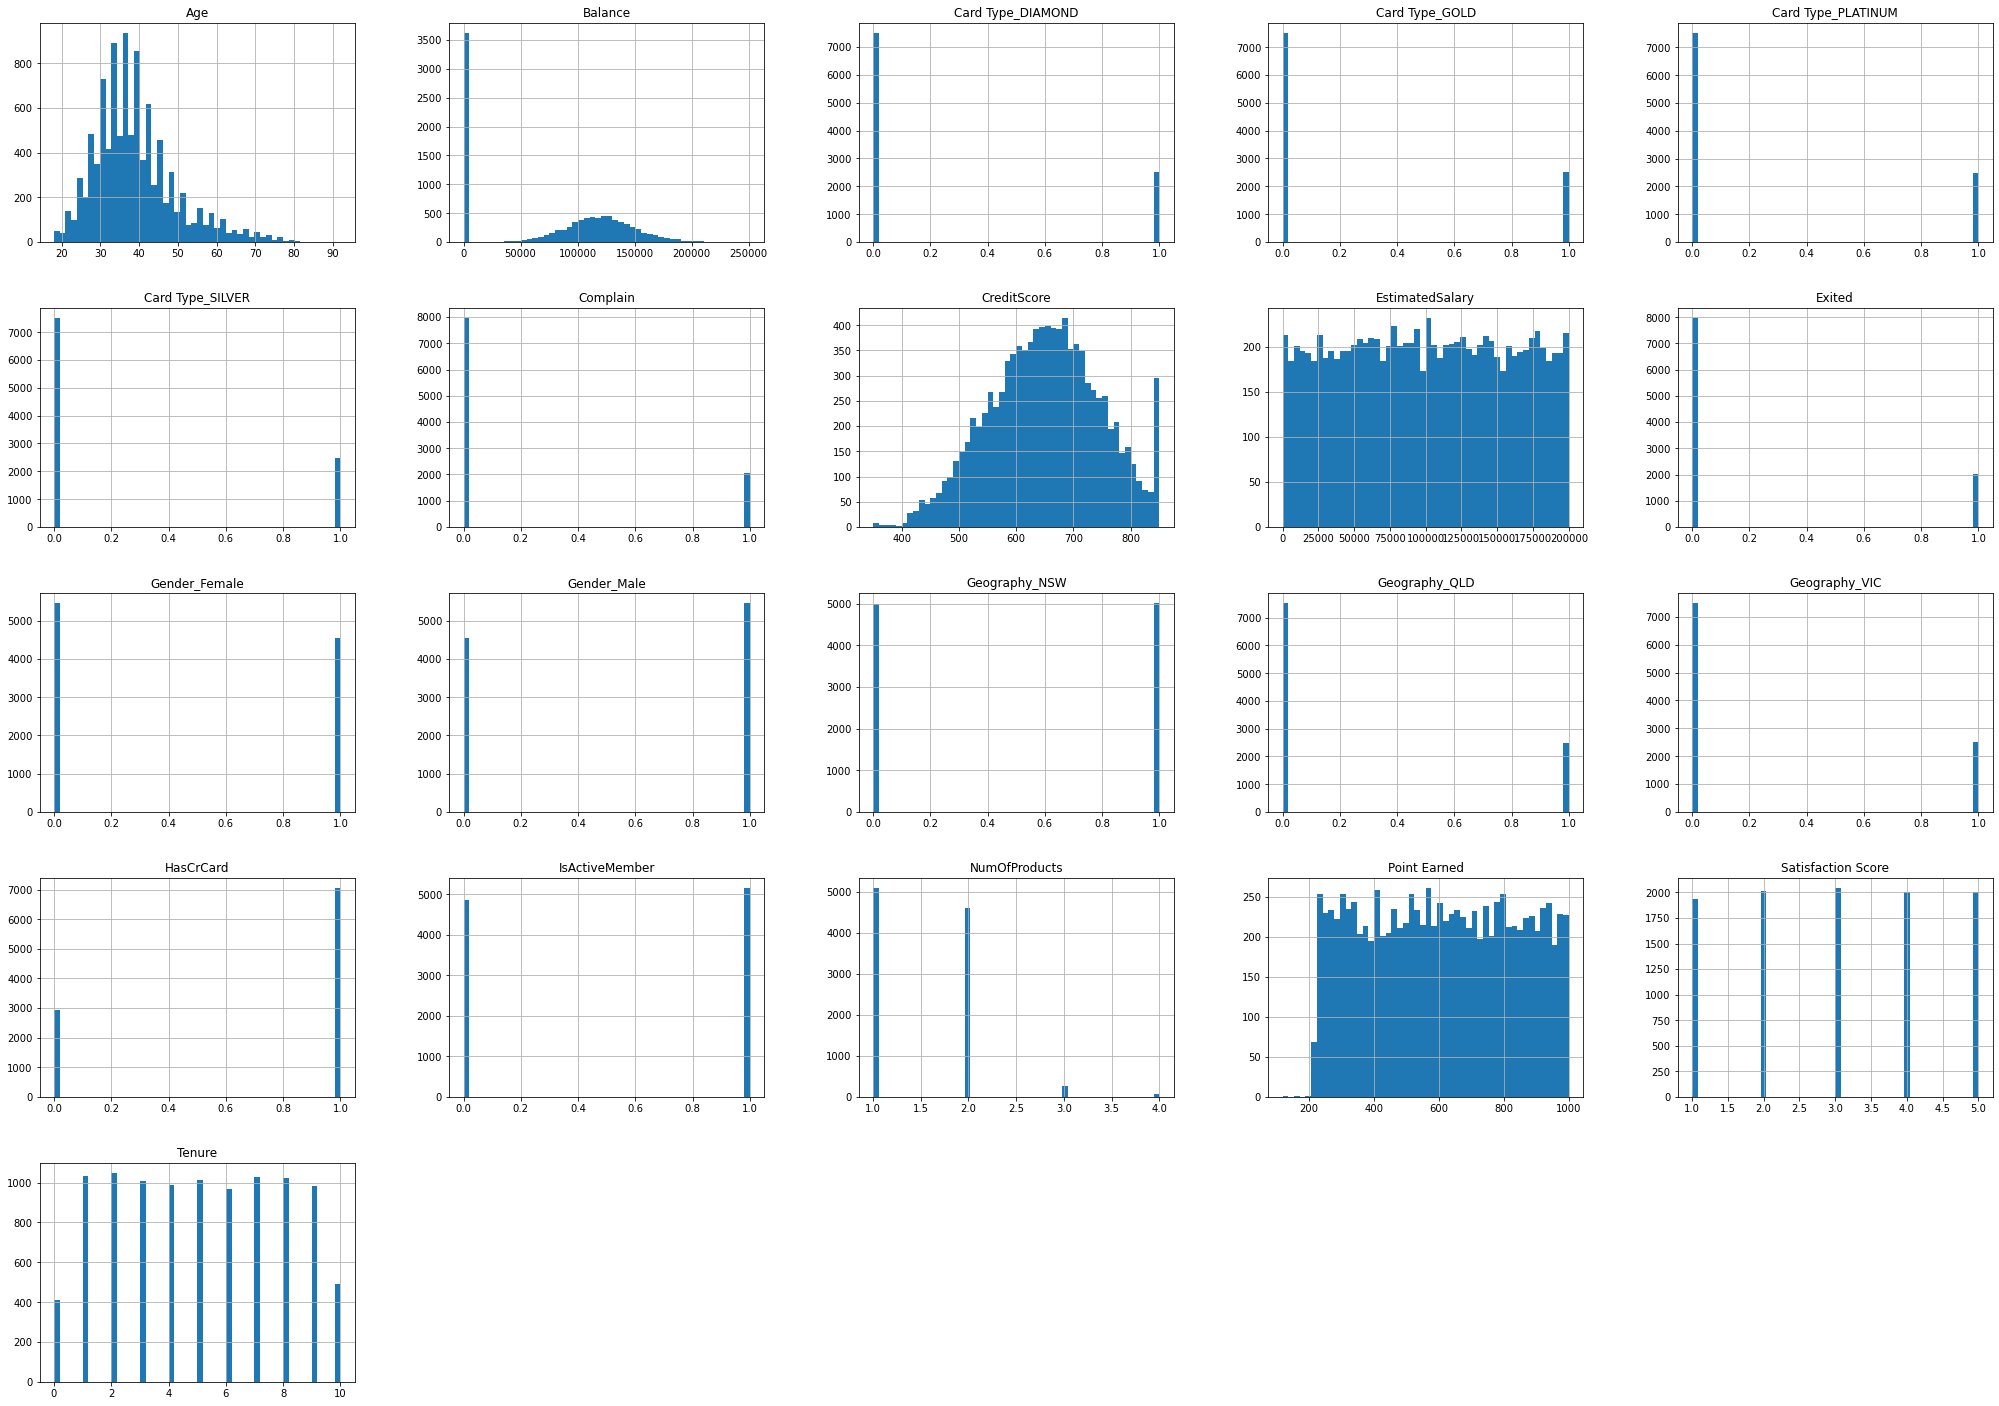

In [13]:
# Visualise each column in a histogram
churn.hist(bins=50, figsize=(35,25))
plt.show()

----------------------------------------

# Creating the models

In [14]:
# Import necessary libraries - models
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier

In [15]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import confusion_matrix, roc_curve, auc
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import accuracy_score
from sklearn.inspection import permutation_importance
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score,precision_score,confusion_matrix,classification_report, precision_recall_curve

Given the exploratory data analysis (EDA) of the bank loan dataset shown above, which column would you choose as the target variable for a classification machine learning problem? Explain your reasoning.

One possible choice for the target variable is the Personal.Loan column, which indicates whether the customer accepted a personal loan offer from the bank or not. This column has a binary value of 0 or 1, which makes it suitable for a classification problem. The goal of the classification model would be to predict whether a new customer is likely to accept a personal loan offer or not, based on the features of the dataset.                                         

**Preparing train and test data**

**Examining dependent (output) feature**

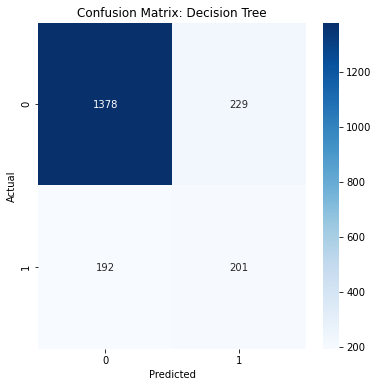

Model: Decision Tree
Accuracy: 0.7895
Precision: 0.46744186046511627
Recall: 0.5114503816793893
F1 score: 0.48845686512758196


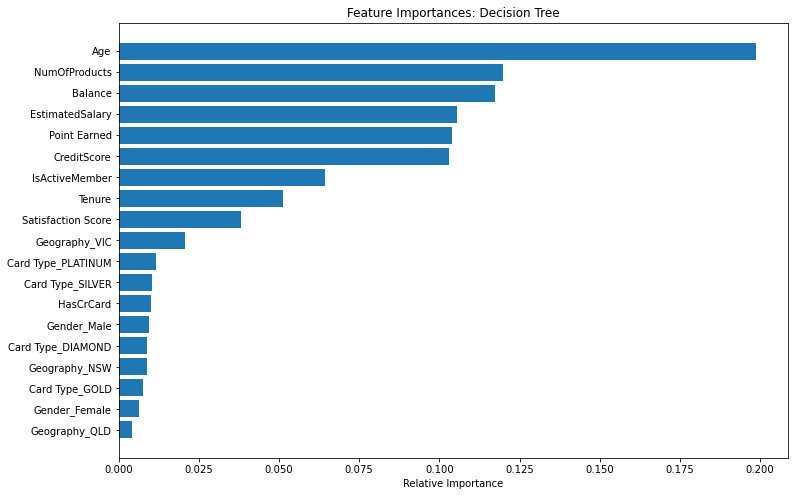

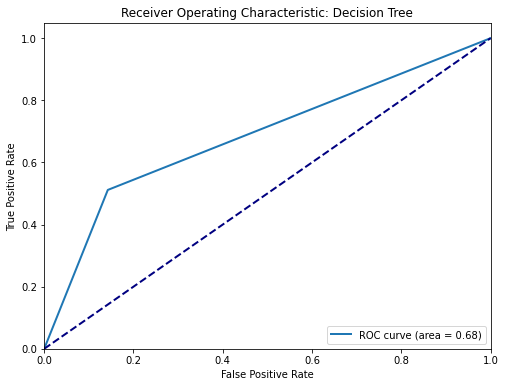

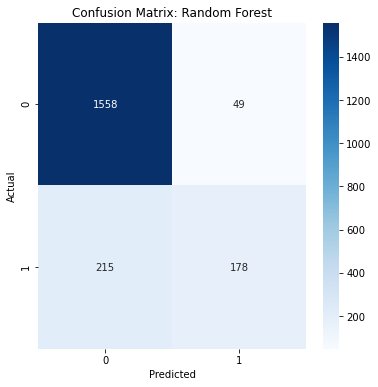

Model: Random Forest
Accuracy: 0.868
Precision: 0.7841409691629956
Recall: 0.4529262086513995
F1 score: 0.5741935483870968


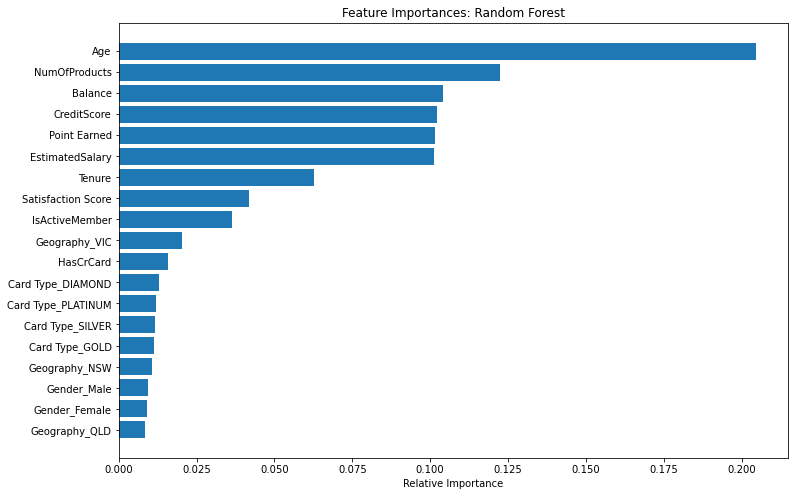

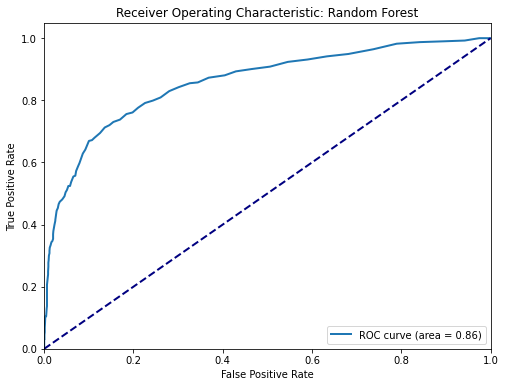

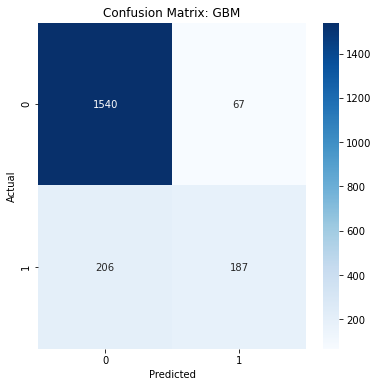

Model: GBM
Accuracy: 0.8635
Precision: 0.7362204724409449
Recall: 0.4758269720101781
F1 score: 0.5780525502318392


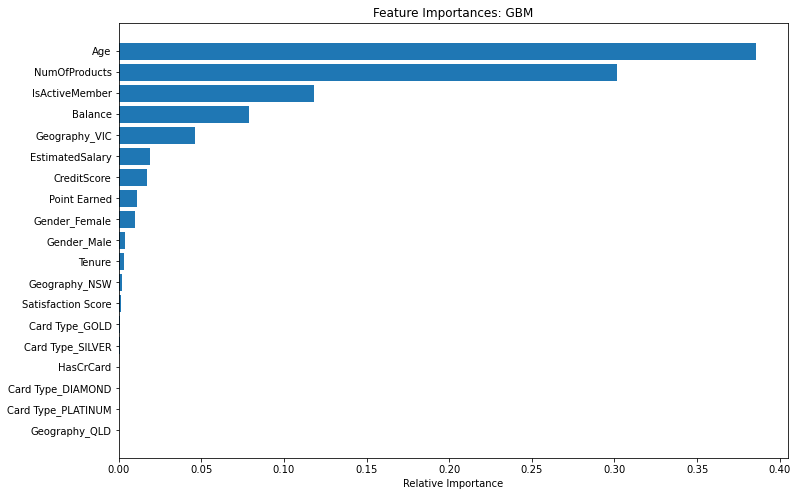

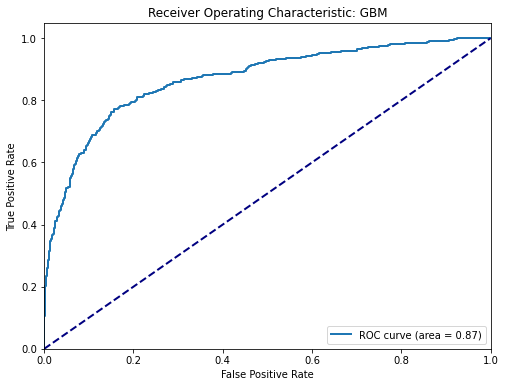

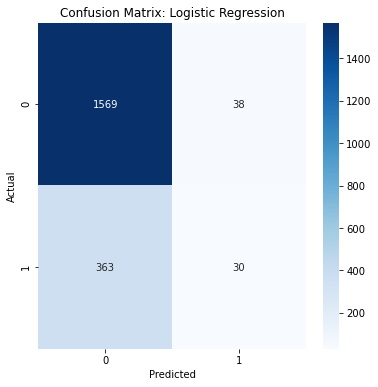

Model: Logistic Regression
Accuracy: 0.7995
Precision: 0.4411764705882353
Recall: 0.07633587786259542
F1 score: 0.1301518438177874


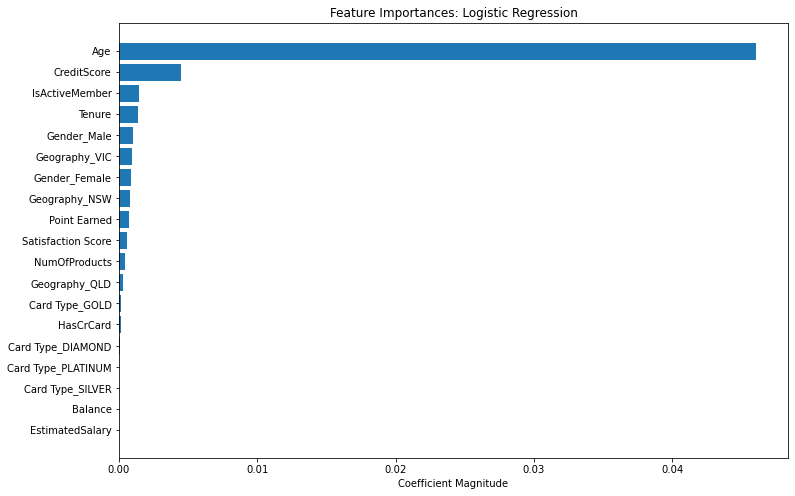

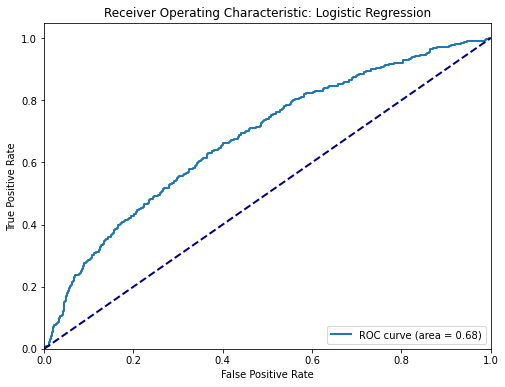

                     Precision    Recall        F1       AUC
Classifier                                                  
Decision Tree         0.467442  0.511450  0.488457  0.684474
Random Forest         0.784141  0.452926  0.574194  0.858048
GBM                   0.736220  0.475827  0.578053  0.869073
Logistic Regression   0.441176  0.076336  0.130152  0.678167


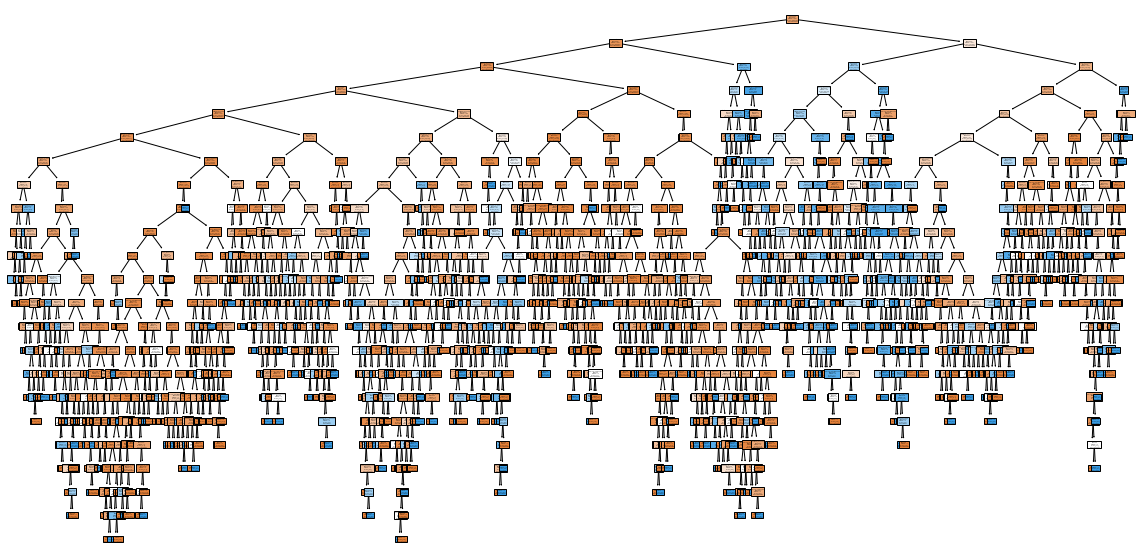

In [16]:
# Define features and target variable
churn_feature = churn.drop(['Exited','Complain'], axis=1)
churn_label = churn['Exited']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(churn_feature, churn_label, test_size=0.2, random_state=42)

# Define classifiers
classifiers = [
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    GradientBoostingClassifier(),
    LogisticRegression(max_iter=1000)  # Ensure logistic regression converges
]

# Classifier names
classifier_names = ['Decision Tree', 'Random Forest', 'GBM', 'Logistic Regression']

# Initialize storage for metrics
results = []

# Fit, evaluate, and visualize classifier models with a for loop
for clf, name in zip(classifiers, classifier_names):
    # Train the model
    clf.fit(X_train, y_train)

    # Predict the response for the test dataset
    y_pred = clf.predict(X_test)
    y_prob = clf.predict_proba(X_test)[:,1]  # Get probability estimates for ROC/AUC

    # Create a confusion matrix
    cm = confusion_matrix(y_test, y_pred)

    # Visualize the confusion matrix
    plt.figure(figsize=(6,6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix: {name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

    # Print evaluation metrics
    print(f"Model: {name}")
    print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
    print("Precision:", metrics.precision_score(y_test, y_pred))
    print("Recall:", metrics.recall_score(y_test, y_pred))
    print("F1 score:", metrics.f1_score(y_test, y_pred))

    # Display feature importance if available
    if hasattr(clf, 'feature_importances_'):
        importances = clf.feature_importances_
        indices = np.argsort(importances)

        plt.figure(figsize=(12,8))
        plt.title(f'Feature Importances: {name}')
        plt.barh(range(len(indices)), importances[indices], align='center')
        plt.yticks(range(len(indices)), [churn_feature.columns[i] for i in indices])
        plt.xlabel('Relative Importance')
        plt.show()
    elif hasattr(clf, 'coef_'):
        importances = np.abs(clf.coef_[0])
        indices = np.argsort(importances)

        plt.figure(figsize=(12,8))
        plt.title(f'Feature Importances: {name}')
        plt.barh(range(len(indices)), importances[indices], align='center')
        plt.yticks(range(len(indices)), [churn_feature.columns[i] for i in indices])
        plt.xlabel('Coefficient Magnitude')
        plt.show()

    # Calculate ROC/AUC
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)

    # Plot ROC curve
    plt.figure(figsize=(8,6))
    plt.plot(fpr, tpr, lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'Receiver Operating Characteristic: {name}')
    plt.legend(loc="lower right")
    plt.show()

    # Evaluate and append results
    results.append({
        'Classifier': name,
        'Precision': metrics.precision_score(y_test, y_pred),
        'Recall': metrics.recall_score(y_test, y_pred),
        'F1': metrics.f1_score(y_test, y_pred),
        'AUC': roc_auc
    })

# Create the comparison table
comparison_table = pd.DataFrame(results)
comparison_table = comparison_table.set_index('Classifier')

print(comparison_table)

# Visualise the decision tree
plt.figure(figsize=(20,10))
plt.title('Decision Tree Visualisation')
plot_tree(classifiers[0], filled=True, feature_names=X_train.columns, class_names=['Not Exited', 'Exited'])
plt.show()

### Correlation Matrix

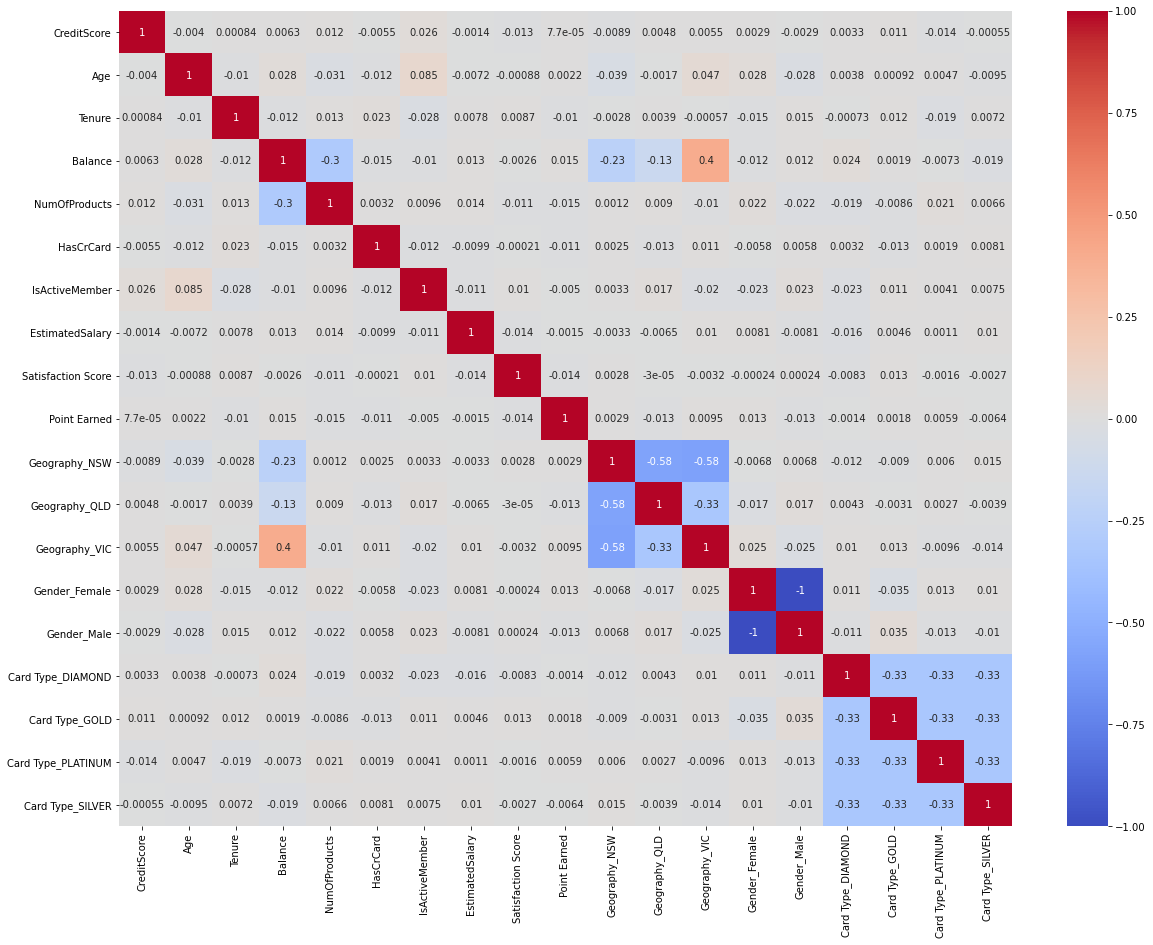

In [34]:
correlation_matrix = churn_feature.corr()

plt.figure(figsize=(20,15))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

### Decision Tree - Hyperparameter Tuning

**Limiting tree depth**

The first tree is very deep so we try limiting tree depth to 5 and generate a new model. Compare model explainability vs performance loss between the two models. 

In [43]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, auc 
import matplotlib.pyplot as plt

# Decision tree hyperparameter tuning
from sklearn.model_selection import GridSearchCV 
param_grid = {
    'max_depth': np.arange(3, 15),
    'min_samples_split': np.arange(2, 15),
    'min_samples_leaf': np.arange(1, 15) 
}

# Create a Decision Tree Classifier with the parameter grid 
clf = DecisionTreeClassifier() 
grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)

print(X_train.shape)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params_dt = grid_search.best_params_ 
print(f'Best parameters for Random Forest: {best_params_dt}')

# Train the model with best parameters
best_grid = grid_search.best_estimator_
best_grid.fit(X_train, y_train)

# Visualise the decision tree
plt.figure(figsize=(15, 7.5))
plot_tree(best_grid, filled=True, rounded=True, 
          feature_names=churn_feature.columns, 
          class_names=['Non-Churner', 'Churner'])
plt.show()

# Predict the response for the test dataset 
y_pred = best_grid.predict(X_test)

# Create a confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Print evaluation metrics for test set
print("Test Set Evaluation Metrics")
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(f"Precision: {precision_score(y_test, y_pred)}")
print(f"Recall: {recall_score(y_test, y_pred)}")
print(f"F1 Score: {f1_score(y_test, y_pred)}")

# Evaluate the model on the training set 
y_train_pred = best_grid.predict(X_train)

# Print evaluation metrics for training set print("Training Set Evaluation Metrics")
print(f"Accuracy: {accuracy_score(y_train, y_train_pred)}")
print(f"Precision: {precision_score(y_train, y_train_pred)}")
print(f"Recall: {recall_score(y_train, y_train_pred)}")
print(f"F1 Score: {f1_score(y_train, y_train_pred)}")

# Predict the probability for the test dataset 
y_pred_proba = best_grid.predict_proba(X_test)[:, 1]

# Compute ROC curve and ROC area
fpr, tpr, _ = roc_curve(y_test, y_pred_proba) 
roc_auc = auc(fpr, tpr)

# Print ROC AUC score
print(f"ROC AUC Score: {roc_auc}")

# Set the size of the figure
plt.figure(figsize=(15, 10))

# Plot ROC curve
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})') 
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--') 
plt.xlim([0.0, 1.0]) 
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate') 
plt.ylabel('True Positive Rate') 
plt.title('Receiver Operating Characteristic') 
plt.legend(loc="lower right")
plt.show()


(12,)
Fitting 3 folds for each of 2184 candidates, totalling 6552 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 88 concurrent workers.
[Parallel(n_jobs=-1)]: Done 210 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done 776 tasks      | elapsed:    2.3s
[Parallel(n_jobs=-1)]: Done 1506 tasks      | elapsed:    3.9s
[Parallel(n_jobs=-1)]: Done 2396 tasks      | elapsed:    5.7s
[Parallel(n_jobs=-1)]: Done 3450 tasks      | elapsed:    7.8s
[Parallel(n_jobs=-1)]: Done 4664 tasks      | elapsed:   10.3s
exception calling callback for <Future at 0x7ff699e49ee0 state=finished returned list>
Traceback (most recent call last):
  File "/opt/conda/lib/python3.8/site-packages/joblib/externals/loky/_base.py", line 625, in _invoke_callbacks
    callback(self)
  File "/opt/conda/lib/python3.8/site-packages/joblib/parallel.py", line 347, in __call__
    self.parallel.dispatch_next()
  File "/opt/conda/lib/python3.8/site-packages/joblib/parallel.py", line 780, in dispatch_next
    if not self.dispatch_one_batch(self._original_iterator):
  File "/opt/co

KeyboardInterrupt: 

exception calling callback for <Future at 0x7ff69a6afeb0 state=finished returned list>
Traceback (most recent call last):
  File "/opt/conda/lib/python3.8/site-packages/joblib/externals/loky/_base.py", line 625, in _invoke_callbacks
    callback(self)
  File "/opt/conda/lib/python3.8/site-packages/joblib/parallel.py", line 347, in __call__
    self.parallel.dispatch_next()
  File "/opt/conda/lib/python3.8/site-packages/joblib/parallel.py", line 780, in dispatch_next
    if not self.dispatch_one_batch(self._original_iterator):
  File "/opt/conda/lib/python3.8/site-packages/joblib/parallel.py", line 847, in dispatch_one_batch
    self._dispatch(tasks)
  File "/opt/conda/lib/python3.8/site-packages/joblib/parallel.py", line 765, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)
  File "/opt/conda/lib/python3.8/site-packages/joblib/_parallel_backends.py", line 531, in apply_async
    future = self._workers.submit(SafeFunction(func))
AttributeError: 'NoneType' object has 

Fitting 3 folds for each of 2184 candidates, totalling 6552 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 88 concurrent workers.
[Parallel(n_jobs=-1)]: Done 190 tasks      | elapsed:    3.9s
[Parallel(n_jobs=-1)]: Done 473 tasks      | elapsed:    5.4s
[Parallel(n_jobs=-1)]: Done 838 tasks      | elapsed:    7.4s
[Parallel(n_jobs=-1)]: Done 1283 tasks      | elapsed:   10.0s
[Parallel(n_jobs=-1)]: Done 1810 tasks      | elapsed:   13.1s
[Parallel(n_jobs=-1)]: Done 2417 tasks      | elapsed:   16.7s
[Parallel(n_jobs=-1)]: Done 3106 tasks      | elapsed:   20.9s
[Parallel(n_jobs=-1)]: Done 3875 tasks      | elapsed:   25.6s
[Parallel(n_jobs=-1)]: Done 4726 tasks      | elapsed:   30.5s
[Parallel(n_jobs=-1)]: Done 5657 tasks      | elapsed:   36.1s
[Parallel(n_jobs=-1)]: Done 6552 out of 6552 | elapsed:   41.3s finished


Best parameters for Random Forest: {'max_depth': 7, 'min_samples_leaf': 14, 'min_samples_split': 2}


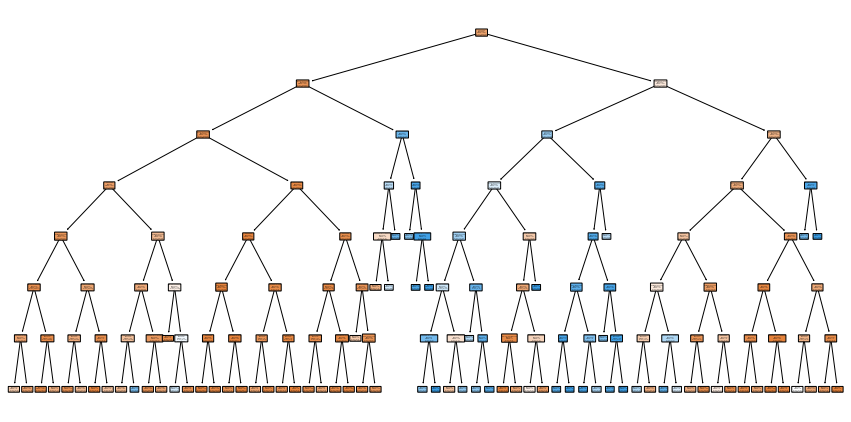

Accuracy: 0.8615
Precision: 0.7148148148148148
Recall: 0.4910941475826972
F1 score: 0.5822021116138764


In [23]:
# Decision tree hyperparameter tuning
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': np.arange(3, 15),
    'min_samples_split': np.arange(2, 15),
    'min_samples_leaf': np.arange(1, 15),
}

# Create a Decision Tree Classifier with the parameter grid
clf = DecisionTreeClassifier()
grid_search = GridSearchCV(estimator = clf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params_dt = grid_search.best_params_
print(f'Best parameters for Random Forest: {best_params_dt}')

# Train the model with best parameters
best_grid = grid_search.best_estimator_
best_grid.fit(X_train, y_train)

# Visualise the decision tree
plt.figure(figsize=(15,7.5))
plot_tree(best_grid, filled=True, rounded=True,
          feature_names=churn_feature.columns,
          class_names=['Non-Churner','Churner'])
plt.show()

# Predict the response for the test dataset
y_pred = best_grid.predict(X_test)

# Create a confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Print evaluation metrics
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
print("Precision:", metrics.precision_score(y_test, y_pred))
print("Recall:", metrics.recall_score(y_test, y_pred))
print("F1 score:", metrics.f1_score(y_test, y_pred))

In [ ]:
from sklearn.model_selection import learning_curve import numpy as np

# Assuming 'estimator' is your model and 'X' and 'y' are your data and labels 

train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, cv=5, n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10))

train_mean = np.mean(train_scores, axis=1) train_std = np.std(train_scores, axis=1) test_mean = np.mean(test_scores, axis=1) test_std = np.std(test_scores, axis=1)

plt.figure()
plt.plot(train_sizes, train_mean, 'o-', color='r', label='Training score') plt.plot(train_sizes, test_mean, 'o-', color='g', label='Cross-validation score') plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1, color='r') plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1, color='g') plt.xlabel('Training size')
plt.ylabel('Score')
plt.legend(loc='best')
plt.title('Learning Curve')
plt.show()


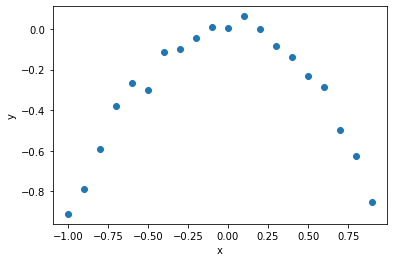

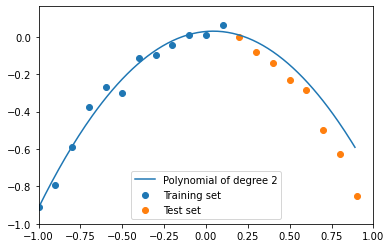

In [35]:
# import useful libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
 
# create the sample points with a little noise, just like in real-life fitting.
np.random.seed(0)
x = np.arange(-1,1,0.1) # 20 points
y = -x**2 + np.random.normal(0,0.05,len(x))
plt.scatter(x,y)
plt.xlabel("x")
plt.ylabel("y")
plt.show()
 
# split this dataset into training and test: 12 train, 8 test.
X_train = x[0:12]
y_train = y[0:12]
X_test = x[12:]
y_test = y[12:]
 
# define a simple polynomial function.
def polynomial_fit(degree = 1):
   return np.poly1d(np.polyfit(X_train,y_train,degree))
 
# define a function that plots the dataset and the best fitting polynomial with a specific degree.
def plot_polyfit(degree = 1):
   p = polynomial_fit(degree)
   plt.scatter(X_train,y_train,label="Training set")
   plt.scatter(X_test,y_test,label="Test set")  
   curve_x = np.arange(min(x),max(x),0.01)
   plt.plot(curve_x,p(curve_x),label="Polynomial of degree {}".format(degree))  
   plt.xlim((-1,1))
   plt.ylim((-1,np.max(y)+0.1))
   plt.legend()  
   plt.plot()
         
 
plot_polyfit(2)

### Random Forest - Hyperparameter Tuning

In [19]:
# Random forest hyperparameter tuning
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create a Random Forest Classifier with the parameter grid
rf_clf = RandomForestClassifier()

# Instantiate the grid search model
grid_search = GridSearchCV(estimator=rf_clf, param_grid=param_grid, cv=3)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params_rf = grid_search.best_params_

print(f'Best parameters for Random Forest: {best_params_rf}')

# Train the model with best parameters
best_grid = grid_search.best_estimator_
best_grid.fit(X_train, y_train)

# Predict the response for the test dataset
y_pred = best_grid.predict(X_test)

# Create a confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Print evaluation metrics
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
print("Precision:", metrics.precision_score(y_test, y_pred))
print("Recall:", metrics.recall_score(y_test, y_pred))
print("F1 score:", metrics.f1_score(y_test, y_pred))

Best parameters for Random Forest: {'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 200}
Accuracy: 0.863
Precision: 0.7575757575757576
Recall: 0.44529262086513993
F1 score: 0.5608974358974359


### Gradient Boosting - Hyperparameter Tuning

In [22]:
# Gradient Boosting hyperparameter tuning
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 1],
       'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create a GBM Classifier with the parameter grid
gbm_clf = GradientBoostingClassifier()

# Instantiate the grid search model
grid_search = GridSearchCV(estimator=gbm_clf, param_grid=param_grid, cv=3)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params_gbm = grid_search.best_params_

print(f'Best parameters for GBM: {best_params_gbm}')

# Train the model with best parameters
best_grid = grid_search.best_estimator_
best_grid.fit(X_train, y_train)

# Predict the response for the test dataset
y_pred = best_grid.predict(X_test)

# Create a confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Print evaluation metrics
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
print("Precision:", metrics.precision_score(y_test, y_pred))
print("Recall:", metrics.recall_score(y_test, y_pred))
print("F1 score:", metrics.f1_score(y_test, y_pred))

KeyboardInterrupt: 

**Example Answer:**

Limiting the maximum depth of a decision tree is a form of regularisation, which is a technique used to prevent overfitting. By setting max_depth to 5, we restrict the tree to only make decisions based on at most five features, thereby simplifying the model. This has several benefits:

1. Preventing Overfitting: A shallower tree is less likely to fit to the noise in the data, leading to better performance on unseen data (i.e., improved generalisation).

2. Improving Interpretability: A shallower tree is easier to visualise and understand. Each decision can be traced through the tree, making it clear why the model made a certain prediction.

3. Reducing Training Time: A shallower tree requires fewer computations to train, which can significantly reduce training time for large datasets. In this case it doesn't matter much.

However, limiting the tree depth also has its trade-offs:

1. Potential Underfitting: If the tree is too shallow, it may not be able to capture important patterns in the data, leading to underfitting. The model might be too simple to accurately model the relationship between the features and the target variable.

2. Loss of Detailed Information: While a less complex model is easier to interpret, it may not capture the detailed information that a deeper tree could. Some nuanced patterns might be missed, which could be crucial in certain applications.

## Decision Tree - Hyperparameters

In [26]:
# Define the parameter grid for Random Forest
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize GridSearchCV for Random Forest
grid_search_rf = GridSearchCV(estimator=RandomForestClassifier(), param_grid=param_grid_rf, cv=3, n_jobs=-1, verbose=2)

# Fit GridSearchCV
grid_search_rf.fit(X_train, y_train)

# Best parameters and estimator
best_params_rf = grid_search_rf.best_params_
best_estimator_rf = grid_search_rf.best_estimator_
print(f"\nBest parameters for Random Forest: {best_params_rf}")


Fitting 3 folds for each of 108 candidates, totalling 324 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 88 concurrent workers.
[Parallel(n_jobs=-1)]: Done 312 out of 324 | elapsed:    6.6s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done 324 out of 324 | elapsed:    7.0s finished



Best parameters for Random Forest: {'max_depth': 30, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}


## Random Forest - Hyperparameters

In [27]:
# Define the parameter grid for Random Forest
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize GridSearchCV for Random Forest
grid_search_rf = GridSearchCV(estimator=RandomForestClassifier(), param_grid=param_grid_rf, cv=3, n_jobs=-1, verbose=2)

# Fit GridSearchCV
grid_search_rf.fit(X_train, y_train)

# Best parameters and estimator
best_params_rf = grid_search_rf.best_params_
best_estimator_rf = grid_search_rf.best_estimator_
print(f"\nBest parameters for Random Forest: {best_params_rf}")


Fitting 3 folds for each of 108 candidates, totalling 324 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 88 concurrent workers.
[Parallel(n_jobs=-1)]: Done 312 out of 324 | elapsed:    6.5s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done 324 out of 324 | elapsed:    6.9s finished



Best parameters for Random Forest: {'max_depth': 30, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 100}


## Gradient Boosting Machines - Hyperparameters

In [28]:
# Define the parameter grid for Gradient Boosting
param_grid_gbm = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize GridSearchCV for Gradient Boosting
grid_search_gbm = GridSearchCV(estimator=GradientBoostingClassifier(), param_grid=param_grid_gbm, cv=3, n_jobs=-1, verbose=2)

# Fit GridSearchCV
grid_search_gbm.fit(X_train, y_train)

# Best parameters and estimator
best_params_gbm = grid_search_gbm.best_params_
best_estimator_gbm = grid_search_gbm.best_estimator_
print(f"\nBest parameters for GBM: {best_params_gbm}")


Fitting 3 folds for each of 243 candidates, totalling 729 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 88 concurrent workers.
[Parallel(n_jobs=-1)]: Done 189 tasks      | elapsed:    8.2s
[Parallel(n_jobs=-1)]: Done 472 tasks      | elapsed:   21.2s
[Parallel(n_jobs=-1)]: Done 729 out of 729 | elapsed:   37.4s finished



Best parameters for GBM: {'learning_rate': 0.1, 'max_depth': 3, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 100}


## Logistic Regression - Hyperparameters



---

